# **Text classification with BBC news article dataset using RNN**

### **Importing Required Libraries & Loading Data**

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



### **Data Cleaning, Preprocessing and Preparation**

In [2]:
#initialize parameters
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [3]:

sentences = []
labels = []
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words=list(stop_words)

print(stop_words)

['that', 'hers', "don't", 'doesn', 'against', 'll', 'themselves', 'to', 'have', 'now', 'more', 'couldn', 'own', 'itself', 'don', "she's", "isn't", "shan't", 'having', 'y', "aren't", 'mightn', 'nor', 'we', 'my', 'these', "mightn't", 'other', 's', 'how', 'shouldn', 'no', 'mustn', 'an', 'such', "shouldn't", 'them', 'shan', 'd', 'before', 'over', 'hasn', 're', 'will', 'the', "haven't", 'between', 'are', 'it', 'should', 'yourselves', 'once', 'out', 'your', 'won', 'for', 'been', 'most', 'be', "you're", 'needn', 'above', 'not', 've', 'because', 'again', 'but', 'during', 'both', "you'll", 'those', 'after', 'herself', 'were', 'into', 'up', 'his', 'in', 'doing', "needn't", 'their', 'at', 'weren', 'about', 'all', 'where', 'she', 'than', 'wasn', 'him', 'further', 'just', 'and', 'her', 'which', 'wouldn', 'who', 'when', 'yourself', 'is', 'did', 'under', 'this', 'do', 'didn', "wasn't", "doesn't", 'with', 'you', 'if', 'some', "hasn't", 'same', 'hadn', 'then', 'down', "you'd", 'very', 'me', 'being', 't

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#Examine data

# Open the CSV file and process each row
with open("/content/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader) # skip header row
    for row in reader:
        # Check if row has at least two columns
        if len(row) >= 2:
            labels.append(row[0])
            sentence = row[1]
            for word in stop_words:
                token = " " + word + " "
                sentence = sentence.replace(token, " ")
            sentences.append(sentence)
print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite 

In [5]:
# split data into training set and validationd set
train_size = int(len(sentences) * training_portion)
train_sentences = sentences[:train_size]
train_labels = labels[:train_size]
validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]
print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))
# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445


1780
1780
1780
445
445


In [6]:
#Tokenize training set
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences) # Turn tokens into sequence
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length) #Pad training sequences
print(len(train_sequences[0]))
print(len(train_padded[0]))
print(len(train_sequences[1]))
print(len(train_padded[1]))
print(len(train_sequences[10]))
print(len(train_padded[10]))
# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120
 


426
120
192
120
186
120


In [7]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences) #tokenize validation sequences
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length) #Pad Validation sequences
print(len(validation_sequences))
print(validation_padded.shape)
# 445
# (445, 120)



445
(445, 120)


In [8]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels) #Tokenize Labels
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels)) #Turn labels into numpy arrays
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)
print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)
# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)


[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


## **Building and Training RNN Model**

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           16000     
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 6)                 150       
                                                                 
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 11s - loss: 1.7598 - accuracy: 0.2618 - val_loss: 1.7163 - val_accuracy: 0.3798 - 11s/epoch - 195ms/step
Epoch 2/30
56/56 - 3s - loss: 1.6679 - accuracy: 0.4719 - val_loss: 1.6105 - val_accuracy: 0.4517 - 3s/epoch - 54ms/step
Epoch 3/30
56/56 - 2s - loss: 1.5603 - accuracy: 0.5011 - val_loss: 1.5024 - val_accuracy: 0.5101 - 2s/epoch - 36ms/step
Epoch 4/30
56/56 - 1s - loss: 1.4350 - accuracy: 0.5719 - val_loss: 1.3652 - val_accuracy: 0.5775 - 1s/epoch - 26ms/step
Epoch 5/30
56/56 - 1s - loss: 1.2577 - accuracy: 0.5938 - val_loss: 1.1771 - val_accuracy: 0.6202 - 993ms/epoch - 18ms/step
Epoch 6/30
56/56 - 2s - loss: 1.0588 - accuracy: 0.6466 - val_loss: 0.9962 - val_accuracy: 0.7056 - 2s/epoch - 34ms/step
Epoch 7/30
56/56 - 1s - loss: 0.8845 - accuracy: 0.7635 - val_loss: 0.8546 - val_accuracy: 0.8202 - 612ms/epoch - 11ms/step
Epoch 8/30
56/56 - 1s - loss: 0.7392 - accuracy: 0.8669 - val_loss: 0.7245 - val_accuracy: 0.8674 - 720ms/epoch - 13ms/step
Epoch 9/30
56/56 - 1

## **Plotting Model Training History**

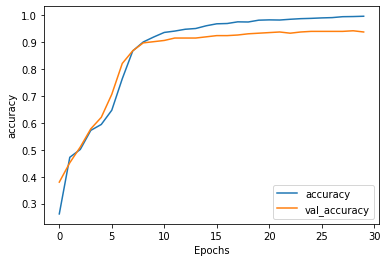

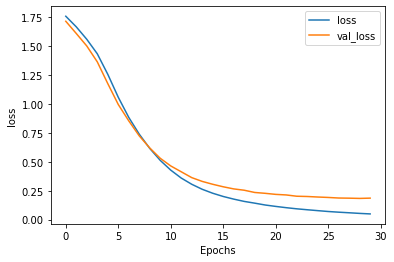

In [15]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#the 2 curves in different colours are close to each other, in the same direction meaning there is no overfitting meaning model is good it propagates o well


In [25]:
# Here's how you can test the trained model with a new text:
# New text to classify
new_text = ["Novak Djokovic has won his third consecutive Grand Slam title, beating Rafael Nadal in the French Open final."]

# Tokenize and pad the new text
new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded = pad_sequences(new_sequences, padding=padding_type, maxlen=max_length)

# Make predictions
predictions = model.predict(new_padded)

# Get the predicted label
predicted_label = label_tokenizer.sequences_to_texts(predictions)[0]

# Print the predicted label
print(predicted_label)

#This code tokenizes and pads a new text, uses the trained model to predict its label, and 
#then prints the predicted label. Note that new_text is a list containing the new text as a string, 
#and the code assumes that the new text has the same maximum length as the training data (i.e., max_length=120).
# Define a dictionary to map integer labels to their corresponding text labels
label_map = {v: k for k, v in label_tokenizer.word_index.items()}

# Use the dictionary to convert the predicted label index back to text
predicted_label_index = np.argmax(predictions[0])
predicted_label = label_map[predicted_label_index]

print(predicted_label)

#In this code, label_map is a dictionary 
#that maps the integer label indices back to their original text labels. 
#predicted_label_index is the index of the predicted label, and predicted_label 
#is the corresponding text label obtained by looking up the dictionary.






1/1 [==============================] - 0s 29ms/step

sport
